In [1]:
import sklearn
print(sklearn.__version__)

1.3.2


In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

<h2>새 모델<h2>

In [2]:
# 체류 상태
f = open(r"C:\Users\sk002\OneDrive\바탕 화면\새 폴더\stop.txt")
stopData = f.read()
f.close()

In [3]:
# 도보 상태
f = open(r"C:\Users\sk002\OneDrive\바탕 화면\새 폴더\walk.txt")
walkData = f.read()
f.close()

In [4]:
# 차량 상태
f = open(r"C:\Users\sk002\OneDrive\바탕 화면\새 폴더\car.txt")
carData = f.read()
f.close()

In [5]:
# 지하철 상태
f = open(r"C:\Users\sk002\OneDrive\바탕 화면\새 폴더\subway.txt")
subwayData = f.read()
f.close()

In [6]:
stopData

'0.33140594, 0.0634098, 9.856036, 0.0, 0.0011453715, -1.527162E-4, 15.0375, 31.81875, -36.018753, 2024-03-15 01:06:03\n-0.19980069, 5.293821, 8.162217, 0.0537561, -0.12087487, 0.028863361, 61.8375, -6.1125, -41.625, 2024-03-15 15:07:25\n0.2428715, -0.42622152, 9.800404, -9.926553E-4, 5.345067E-4, -7.63581E-5, 64.8375, 3.5812502, -42.24375, 2024-03-15 15:08:25\n0.22432712, -0.39900318, 9.787542, 0.0, -1.527162E-4, -7.63581E-5, 64.55625, 3.1875002, -42.1875, 2024-03-15 15:09:25\n0.21505493, -0.39631125, 9.787841, 3.8179048E-4, 1.527162E-4, 7.63581E-5, 64.5, 2.98125, -42.881252, 2024-03-15 15:10:25\n0.21714866, -0.3900301, 9.779765, -7.63581E-5, -3.054324E-4, -6.8722287E-4, 57.862503, 2.2125, -42.037502, 2024-03-15 15:11:25\n0.20937198, -0.38763726, 9.783355, 7.63581E-5, -6.108648E-4, -2.290743E-4, 59.381252, 2.9250002, -41.7, 2024-03-15 15:12:25\n0.19920248, -0.3909274, 9.817452, 0.0020616686, -0.0010690134, 0.0017562362, 58.218754, 2.4, -42.0, 2024-03-15 15:13:25\n0.20279172, -0.3870390

In [6]:
stopData = stopData.split('\n')
stopData

['0.33140594, 0.0634098, 9.856036, 0.0, 0.0011453715, -1.527162E-4, 15.0375, 31.81875, -36.018753, 2024-03-15 01:06:03',
 '-0.19980069, 5.293821, 8.162217, 0.0537561, -0.12087487, 0.028863361, 61.8375, -6.1125, -41.625, 2024-03-15 15:07:25',
 '0.2428715, -0.42622152, 9.800404, -9.926553E-4, 5.345067E-4, -7.63581E-5, 64.8375, 3.5812502, -42.24375, 2024-03-15 15:08:25',
 '0.22432712, -0.39900318, 9.787542, 0.0, -1.527162E-4, -7.63581E-5, 64.55625, 3.1875002, -42.1875, 2024-03-15 15:09:25',
 '0.21505493, -0.39631125, 9.787841, 3.8179048E-4, 1.527162E-4, 7.63581E-5, 64.5, 2.98125, -42.881252, 2024-03-15 15:10:25',
 '0.21714866, -0.3900301, 9.779765, -7.63581E-5, -3.054324E-4, -6.8722287E-4, 57.862503, 2.2125, -42.037502, 2024-03-15 15:11:25',
 '0.20937198, -0.38763726, 9.783355, 7.63581E-5, -6.108648E-4, -2.290743E-4, 59.381252, 2.9250002, -41.7, 2024-03-15 15:12:25',
 '0.19920248, -0.3909274, 9.817452, 0.0020616686, -0.0010690134, 0.0017562362, 58.218754, 2.4, -42.0, 2024-03-15 15:13:25',

In [7]:
walkData = walkData.split('\n')
walkData

['0.2105684, 2.8193433, 9.044271, 0.014355322, -0.06253728, -0.211741, -10.14375, -38.0625, -20.362501, 2024-03-15 18:27:46',
 '4.640281, -2.3204398, 2.3611178, 0.83917546, -1.6789619, 1.250593, -6.525, 25.837502, -25.406252, 2024-03-15 18:28:46',
 '2.6219354, -8.215158, 3.6526437, -0.18936808, 0.80557793, -0.37026042, 41.1375, 30.675001, -20.868752, 2024-03-15 18:29:46',
 '2.129014, -9.448658, 1.0049855, 0.0027488915, 0.21784966, -0.04382955, -8.925, 26.062502, -27.525002, 2024-03-15 18:30:46',
 '3.7411783, -9.6993065, 0.14416756, 0.026267186, 0.06551525, -0.010231985, -6.0937505, 29.025002, -26.362501, 2024-03-15 18:31:46',
 '3.714259, -7.7090764, -1.6390835, -0.55519974, -1.1085669, 0.2196059, 6.9375005, 21.69375, -27.393751, 2024-03-15 18:32:46',
 '2.7218359, -9.665209, 3.8943188, 1.1462114, -0.34124434, 0.47769627, 3.61875, 32.268753, -18.6, 2024-03-15 18:33:46',
 '7.252047, -8.192427, -0.8805587, -0.60949033, 0.0410043, -0.2523635, 13.312501, 38.643753, 0.24375, 2024-03-15 18:34:

In [8]:
carData = carData.split('\n')
carData

['-1.8173488, 2.858825, 9.495916, -0.30879214, 0.25060728, 0.26534438, -27.825, -4.59375, -37.2, 2024-03-15 23:19:49',
 '-2.9078777, 2.99043, 9.269794, 0.24129158, 0.95730144, 0.010231985, 8.8125, 29.60625, -39.225002, 2024-03-15 23:19:54',
 '-0.43489552, 2.0321047, 10.124631, 0.0018325944, -0.008933897, -0.03527744, 13.387501, 31.368752, -38.268753, 2024-03-15 23:20:54',
 '-1.2197413, 1.5074782, 9.793225, 0.0073303776, 0.0030543238, 0.017409647, 15.712501, 48.750004, -39.6375, 2024-03-15 23:21:54',
 '-1.5170496, 0.46061835, 9.563514, 0.038560838, -0.0129808765, -0.020387612, -3.91875, 38.23125, -42.3375, 2024-03-15 23:22:54',
 '-2.3748765, 5.752944, 7.6947193, 0.03405571, 0.08414663, 0.016035201, 13.425, -32.756252, 25.650002, 2024-03-16 18:02:06',
 '-2.1954148, 5.482555, 8.006983, -0.025961753, -0.03046688, -0.007864884, 10.293751, -29.7, 26.737501, 2024-03-16 18:02:07',
 '-2.094318, 5.633901, 7.9148593, 0.01244637, 0.012522728, 0.011300999, 12.262501, -28.743752, 15.1125, 2024-03-16

In [9]:
subwayData = subwayData.split('\n')
subwayData

['0.40438703, 6.2464633, 7.5296144, 0.17340924, -0.21746786, -0.0054214248, -30.281252, -33.975002, 9.8625, 2024-03-18 13:40:21',
 '0.4660022, 6.1998034, 7.623533, -0.02687805, 0.0140498895, 9.162972E-4, -29.906252, -34.29375, 13.575001, 2024-03-18 13:40:22',
 '0.19920248, 6.0711894, 7.75454, -0.0058032153, 0.020387612, 0.0066431547, -27.843752, -37.10625, 4.3500004, 2024-03-18 13:40:23',
 '0.57427746, 6.3804617, 7.90469, 0.048411034, -0.0721584, -0.006185006, -26.643751, -38.381252, -0.0375, 2024-03-18 13:40:23',
 '0.34337005, 6.0604215, 7.7826557, 0.0026725335, -0.0140498895, 9.162972E-4, -25.25625, -39.5625, -3.8625002, 2024-03-18 13:40:24',
 '0.33200413, 6.1100726, 7.4602227, -0.019853106, 0.038789913, -0.0072540194, -25.25625, -39.46875, -3.825, 2024-03-18 13:40:25',
 '0.2219343, 5.6153564, 8.202596, 0.02565632, 0.032375835, -0.0075594517, -25.406252, -39.5625, -4.2562504, 2024-03-18 13:40:25',
 '0.12622139, 5.9413786, 7.95793, 0.013515383, 0.037110034, 0.0015271619, -24.45, -39.8

In [10]:
print(len(stopData))
print(len(walkData))
print(len(carData))
print(len(subwayData))

10701
2711
1002
2703


In [11]:
# 데이터를 ','로 분리하고 DataFrame으로 변환
# 1 : 가속도 | 2 : 자이로 | 3 : 방향
df1 = pd.DataFrame([row.split(',') for row in stopData],
                  columns=['x1', 'y1', 'z1', 'x2', 'y2', 'z2', 'x3', 'y3', 'z3', '날짜'])
df1['label'] = 1
df1

x1            y1          z1             x2             y2   
0        0.33140594     0.0634098    9.856036            0.0   0.0011453715  \
1       -0.19980069      5.293821    8.162217      0.0537561    -0.12087487   
2         0.2428715   -0.42622152    9.800404   -9.926553E-4    5.345067E-4   
3        0.22432712   -0.39900318    9.787542            0.0   -1.527162E-4   
4        0.21505493   -0.39631125    9.787841   3.8179048E-4    1.527162E-4   
...             ...           ...         ...            ...            ...   
10696    -0.2835495     2.2935205    9.918848    0.004734202    -0.13637556   
10697   -0.33200413     2.7589245    9.102298    -0.06101012    -0.20364705   
10698   -0.36729828      2.047658     9.71127      -0.126449     0.07788526   
10699  -0.005383851     2.6703901   10.329815    9.926553E-4     0.13614649   
10700   -0.19800608     2.7738798    9.722636    -0.07658717    0.052458014   

                  z2           x3           y3           z3   
0       -1.527162E-4      15.0375     31.81875   -36.018753  \
1        0.028863361      61.8375      -6.1125      -41.625   
2        -7.63581E-5      64.8375    3.5812502    -42.24375   
3        -7.63581E-5     64.55625    3.1875002     -42.1875   
4         7.63581E-5         64.5      2.98125   -42.881252   
...              ...          ...          ...          ...   
10696    -0.05146536       -40.65    -59.23125    1.2375001   
10697    -0.38209593        -38.7   -58.593754         0.15   
10698    0.054748755   -34.612503   -56.625004       -4.425   
10699     0.02932151   -37.725002    -54.99375   -1.6125001   
10700    0.018631376        -43.2    -53.79375      1.25625   

                         날짜  label  
0       2024-03-15 01:06:03      1  
1       2024-03-15 15:07:25      1  
2       2024-03-15 15:08:25      1  
3       2024-03-15 15:09:25      1  
4       2024-03-15 15:10:25      1  
...                     ...    ...  
10696   2024-03-18 13:55:32      1  
10697   2024-03-18 13:55:33      1  
10698   2024-03-18 13:55:35      1  
10699   2024-03-18 13:55:36      1  
10700   2024-03-18 13:55:37      1  

[10701 rows x 11 columns]

In [12]:
# 데이터를 ','로 분리하고 DataFrame으로 변환
# 1 : 가속도 | 2 : 자이로 | 3 : 방향
df2 = pd.DataFrame([row.split(',') for row in walkData],
                  columns=['x1', 'y1', 'z1', 'x2', 'y2', 'z2', 'x3', 'y3', 'z3', '날짜'])
df2['label'] = 2
df2

x1           y1           z1             x2            y2   
0      0.2105684    2.8193433     9.044271    0.014355322   -0.06253728  \
1       4.640281   -2.3204398    2.3611178     0.83917546    -1.6789619   
2      2.6219354    -8.215158    3.6526437    -0.18936808    0.80557793   
3       2.129014    -9.448658    1.0049855   0.0027488915    0.21784966   
4      3.7411783   -9.6993065   0.14416756    0.026267186    0.06551525   
...          ...          ...          ...            ...           ...   
2706   -3.531208    8.5423765    11.415559   -0.021303909   -0.35300347   
2707  -2.8773692     8.587242    11.211571    0.060857404    -0.3668243   
2708  -2.4005992    7.8981094     9.792626    -0.12018765    0.12301289   
2709  -2.9826534     6.055636    10.837692     0.06551525   -0.44524407   
2710  -2.8905299      7.94118    10.792229     0.04657844   -0.35651594   

                 z2           x3           y3           z3   
0         -0.211741    -10.14375     -38.0625   -20.362501  \
1          1.250593       -6.525    25.837502   -25.406252   
2       -0.37026042      41.1375    30.675001   -20.868752   
3       -0.04382955       -8.925    26.062502   -27.525002   
4      -0.010231985   -6.0937505    29.025002   -26.362501   
...             ...          ...          ...          ...   
2706    -0.46425724   -22.181252       -43.65     -24.6375   
2707    -0.59803665   -23.643751      -44.625   -27.187502   
2708     -0.3035998   -24.431252       -46.95   -24.393751   
2709     -0.4058433     -26.6625   -49.725002        -23.7   
2710    -0.45562875       -23.85   -55.143753   -16.743752   

                        날짜  label  
0      2024-03-15 18:27:46      2  
1      2024-03-15 18:28:46      2  
2      2024-03-15 18:29:46      2  
3      2024-03-15 18:30:46      2  
4      2024-03-15 18:31:46      2  
...                    ...    ...  
2706   2024-03-18 18:45:55      2  
2707   2024-03-18 18:45:57      2  
2708   2024-03-18 18:45:58      2  
2709   2024-03-18 18:45:59      2  
2710   2024-03-18 18:46:00      2  

[2711 rows x 11 columns]

In [13]:
# 데이터를 ','로 분리하고 DataFrame으로 변환
# 1 : 가속도 | 2 : 자이로 | 3 : 방향
df3 = pd.DataFrame([row.split(',') for row in carData],
                  columns=['x1', 'y1', 'z1', 'x2', 'y2', 'z2', 'x3', 'y3', 'z3', '날짜'])
df3['label'] = 3
df3

x1           y1          z1             x2              y2   
0      -1.8173488     2.858825    9.495916    -0.30879214      0.25060728  \
1      -2.9078777      2.99043    9.269794     0.24129158      0.95730144   
2     -0.43489552    2.0321047   10.124631   0.0018325944    -0.008933897   
3      -1.2197413    1.5074782    9.793225   0.0073303776    0.0030543238   
4      -1.5170496   0.46061835    9.563514    0.038560838   -0.0129808765   
...           ...          ...         ...            ...             ...   
997   -0.38344982     5.775676     8.29113    -0.09964732       -0.040088   
998    -1.2891332     5.220541    8.318648     0.27359107      0.11766783   
999    -1.7437695    1.6600207   10.173684     -0.3915643      -0.2629773   
1000    1.6624135     3.399603     8.09133     0.90866137      -0.6877574   
1001    2.4975085      2.44367    8.722437     0.46051568      0.38919723   

                 z2          x3          y3           z3   
0        0.26534438     -27.825    -4.59375        -37.2  \
1       0.010231985      8.8125    29.60625   -39.225002   
2       -0.03527744   13.387501   31.368752   -38.268753   
3       0.017409647   15.712501   48.750004     -39.6375   
4      -0.020387612    -3.91875    38.23125     -42.3375   
...             ...         ...         ...          ...   
997             0.0    66.09375    15.01875   -24.431252   
998     -0.15714496   65.475006   14.962501    -27.16875   
999         0.06269    63.16875    19.06875     -25.7625   
1000     0.40240717    56.98125   25.556252   -15.993751   
1001     0.20807582     48.7125     27.4125   -24.431252   

                        날짜  label  
0      2024-03-15 23:19:49      3  
1      2024-03-15 23:19:54      3  
2      2024-03-15 23:20:54      3  
3      2024-03-15 23:21:54      3  
4      2024-03-15 23:22:54      3  
...                    ...    ...  
997    2024-03-18 22:50:49      3  
998    2024-03-18 22:50:50      3  
999    2024-03-18 22:50:51      3  
1000   2024-03-18 22:50:52      3  
1001   2024-03-18 22:50:53      3  

[1002 rows x 11 columns]

In [14]:
# 데이터를 ','로 분리하고 DataFrame으로 변환
# 1 : 가속도 | 2 : 자이로 | 3 : 방향
df4 = pd.DataFrame([row.split(',') for row in subwayData],
                  columns=['x1', 'y1', 'z1', 'x2', 'y2', 'z2', 'x3', 'y3', 'z3', '날짜'])
df4['label'] = 4
df4

x1          y1          z1              x2              y2   
0      0.40438703   6.2464633   7.5296144      0.17340924     -0.21746786  \
1       0.4660022   6.1998034    7.623533     -0.02687805    0.0140498895   
2      0.19920248   6.0711894     7.75454   -0.0058032153     0.020387612   
3      0.57427746   6.3804617     7.90469     0.048411034      -0.0721584   
4      0.34337005   6.0604215   7.7826557    0.0026725335   -0.0140498895   
...           ...         ...         ...             ...             ...   
2698   -0.8488538    6.047859   6.8985076   -0.0044287695    -0.014813471   
2699  -0.79800636   6.1357956   7.9351983     0.037568185    0.0067958706   
2700   -1.1694921    5.852246    8.236095    -0.023747368    -0.010613776   
2701    -1.329213   6.3254266     8.07458    -0.031688612     0.010002911   
2702   -0.8428718    5.959923    7.811968    -0.047571093      -0.0820086   

                  z2           x3           y3           z3   
0      -0.0054214248   -30.281252   -33.975002       9.8625  \
1        9.162972E-4   -29.906252    -34.29375    13.575001   
2       0.0066431547   -27.843752    -37.10625    4.3500004   
3       -0.006185006   -26.643751   -38.381252      -0.0375   
4        9.162972E-4    -25.25625     -39.5625   -3.8625002   
...              ...          ...          ...          ...   
2698     0.018555017    25.612501   -79.200005   -16.087502   
2699    -0.011911863    25.968752   -80.381256   -16.181252   
2700     0.005345067      26.8875     -80.7375    -12.95625   
2701     0.009392046    26.643751    -79.70625    -12.13125   
2702      0.06330086    25.275002     -78.3375     -12.1125   

                        날짜  label  
0      2024-03-18 13:40:21      4  
1      2024-03-18 13:40:22      4  
2      2024-03-18 13:40:23      4  
3      2024-03-18 13:40:23      4  
4      2024-03-18 13:40:24      4  
...                    ...    ...  
2698   2024-03-18 15:10:29      4  
2699   2024-03-18 15:10:30      4  
2700   2024-03-18 15:10:31      4  
2701   2024-03-18 15:10:32      4  
2702   2024-03-18 15:10:33      4  

[2703 rows x 11 columns]

In [15]:
# 각 df 병합
df_combined = pd.concat([df1, df2, df3, df4], ignore_index=True)

df_combined

x1            y1          z1              x2             y2   
0       0.33140594     0.0634098    9.856036             0.0   0.0011453715  \
1      -0.19980069      5.293821    8.162217       0.0537561    -0.12087487   
2        0.2428715   -0.42622152    9.800404    -9.926553E-4    5.345067E-4   
3       0.22432712   -0.39900318    9.787542             0.0   -1.527162E-4   
4       0.21505493   -0.39631125    9.787841    3.8179048E-4    1.527162E-4   
...            ...           ...         ...             ...            ...   
17112   -0.8488538      6.047859   6.8985076   -0.0044287695   -0.014813471   
17113  -0.79800636     6.1357956   7.9351983     0.037568185   0.0067958706   
17114   -1.1694921      5.852246    8.236095    -0.023747368   -0.010613776   
17115    -1.329213     6.3254266     8.07458    -0.031688612    0.010002911   
17116   -0.8428718      5.959923    7.811968    -0.047571093     -0.0820086   

                  z2          x3           y3           z3   
0       -1.527162E-4     15.0375     31.81875   -36.018753  \
1        0.028863361     61.8375      -6.1125      -41.625   
2        -7.63581E-5     64.8375    3.5812502    -42.24375   
3        -7.63581E-5    64.55625    3.1875002     -42.1875   
4         7.63581E-5        64.5      2.98125   -42.881252   
...              ...         ...          ...          ...   
17112    0.018555017   25.612501   -79.200005   -16.087502   
17113   -0.011911863   25.968752   -80.381256   -16.181252   
17114    0.005345067     26.8875     -80.7375    -12.95625   
17115    0.009392046   26.643751    -79.70625    -12.13125   
17116     0.06330086   25.275002     -78.3375     -12.1125   

                         날짜  label  
0       2024-03-15 01:06:03      1  
1       2024-03-15 15:07:25      1  
2       2024-03-15 15:08:25      1  
3       2024-03-15 15:09:25      1  
4       2024-03-15 15:10:25      1  
...                     ...    ...  
17112   2024-03-18 15:10:29      4  
17113   2024-03-18 15:10:30      4  
17114   2024-03-18 15:10:31      4  
17115   2024-03-18 15:10:32      4  
17116   2024-03-18 15:10:33      4  

[17117 rows x 11 columns]

In [16]:
df_combined = df_combined.drop(['날짜'], axis=1)

In [17]:
df_combined = df_combined.drop_duplicates(ignore_index=True)

df_combined

x1            y1          z1              x2             y2   
0       0.33140594     0.0634098    9.856036             0.0   0.0011453715  \
1      -0.19980069      5.293821    8.162217       0.0537561    -0.12087487   
2        0.2428715   -0.42622152    9.800404    -9.926553E-4    5.345067E-4   
3       0.22432712   -0.39900318    9.787542             0.0   -1.527162E-4   
4       0.21505493   -0.39631125    9.787841    3.8179048E-4    1.527162E-4   
...            ...           ...         ...             ...            ...   
16321   -0.8488538      6.047859   6.8985076   -0.0044287695   -0.014813471   
16322  -0.79800636     6.1357956   7.9351983     0.037568185   0.0067958706   
16323   -1.1694921      5.852246    8.236095    -0.023747368   -0.010613776   
16324    -1.329213     6.3254266     8.07458    -0.031688612    0.010002911   
16325   -0.8428718      5.959923    7.811968    -0.047571093     -0.0820086   

                  z2          x3           y3           z3  label  
0       -1.527162E-4     15.0375     31.81875   -36.018753      1  
1        0.028863361     61.8375      -6.1125      -41.625      1  
2        -7.63581E-5     64.8375    3.5812502    -42.24375      1  
3        -7.63581E-5    64.55625    3.1875002     -42.1875      1  
4         7.63581E-5        64.5      2.98125   -42.881252      1  
...              ...         ...          ...          ...    ...  
16321    0.018555017   25.612501   -79.200005   -16.087502      4  
16322   -0.011911863   25.968752   -80.381256   -16.181252      4  
16323    0.005345067     26.8875     -80.7375    -12.95625      4  
16324    0.009392046   26.643751    -79.70625    -12.13125      4  
16325     0.06330086   25.275002     -78.3375     -12.1125      4  

[16326 rows x 10 columns]

In [18]:
X = df_combined.drop(['label'], axis=1)  # 'label' 컬럼 제외한 나머지를 특성으로 사용
y = df_combined['label']  # 'label' 컬럼을 타겟으로 사용

# train : valid : test = 0.72 : 0.08 : 0.2 = 326 : 37 : 91
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# train : test = 0.8 : 0.2
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)


In [19]:
from sklearn.ensemble import RandomForestClassifier

# 모델 생성 및 학습
rf_model = RandomForestClassifier(random_state=0)

# 탐색할 하이퍼파라미터 그리드 설정
param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [None, 10, 20, 30]
}

# GridSearchCV 객체 생성
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, scoring='accuracy')

# 그리드 서치 수행 (학습 데이터 사용)
grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터 출력
print("Best Hyperparameters:", grid_search.best_params_)

# 테스트 데이터로 예측 수행
y_pred = grid_search.predict(X_test)

# 정확도 계산
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Best Hyperparameters: {'max_depth': 20, 'n_estimators': 100}
Accuracy: 0.95


In [21]:
# 모델 저장
import pickle

with open('random_forest_model_mk2.pkl', 'wb') as model_file:
    pickle.dump(grid_search, model_file)

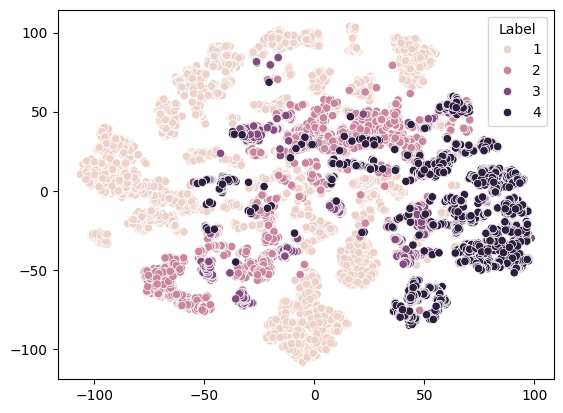

In [20]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 X와 레이블 y를 사용한다고 가정
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

sns.set_palette("deep")
sns.scatterplot(x = X_tsne[:, 0], y = X_tsne[:, 1], hue=y)
plt.legend(title='Label')
plt.show()


<h2>기존 모델<h2>

In [15]:
# 체류 상태
f = open("C:\\Users\\sk002\\OneDrive\\바탕 화면\\학교\\Yoodori\\SensorData1.txt")

data1 = f.read()

f.close()

In [3]:
# 도보 상태
f = open("C:\\Users\\sk002\\OneDrive\\바탕 화면\\학교\\Yoodori\\SensorData2.txt")

data2 = f.read()

f.close()

In [4]:
# 차량 상태
f = open("C:\\Users\\sk002\\OneDrive\\바탕 화면\\학교\\Yoodori\\SensorData3.txt")

data3 = f.read()

f.close()

In [5]:
# 지하철 이용 상태
f = open("C:\\Users\\sk002\\OneDrive\\바탕 화면\\학교\\Yoodori\\SensorData4.txt")

data4 = f.read()

f.close()

In [16]:
type(data1)

str

In [6]:
data1 = data1.split('\n')
data1 = data1[:-1]
data1

['2024-01-25 16:33:57,0.04,0.10,9.81,-0.00,0.00,0.00,0.24,-8.12,-34.33',
 '2024-01-25 16:33:58,0.04,0.10,9.81,0.00,0.00,0.00,0.86,-8.03,-34.01',
 '2024-01-25 16:33:59,0.04,0.10,9.81,-0.00,-0.00,0.00,-0.08,-8.19,-34.31',
 '2024-01-25 16:34:00,0.03,0.10,9.81,-0.00,-0.00,0.00,0.38,-7.93,-34.18',
 '2024-01-25 16:34:01,0.03,0.10,9.81,-0.00,0.00,0.00,0.83,-7.56,-33.79',
 '2024-01-25 16:34:02,0.04,0.10,9.81,0.00,0.00,-0.00,0.56,-7.58,-34.11',
 '2024-01-25 16:34:03,0.04,0.10,9.79,-0.00,0.00,0.00,0.06,-7.74,-34.28',
 '2024-01-25 16:34:04,0.04,0.10,9.80,-0.00,0.00,0.00,0.11,-8.04,-33.98',
 '2024-01-25 16:34:05,0.04,0.10,9.80,-0.00,0.00,-0.00,0.23,-7.65,-34.44',
 '2024-01-25 16:34:06,0.04,0.10,9.80,0.00,-0.00,0.00,0.49,-7.56,-34.43',
 '2024-01-25 16:34:07,0.04,0.10,9.80,-0.00,-0.00,-0.00,-0.06,-7.58,-33.90',
 '2024-01-25 16:34:08,0.04,0.10,9.79,-0.00,0.00,-0.00,-0.23,-7.52,-33.62',
 '2024-01-25 16:34:09,0.03,0.08,9.78,-0.00,0.00,0.00,-0.38,-7.28,-33.68',
 '2024-01-25 16:34:10,-0.04,0.12,9.79,-0.0

In [7]:
data2 = data2.split('\n')
data2 = data2[:-1]
data2

['2024-01-25 16:38:10,-3.14,4.35,6.89,0.50,-0.86,-0.84,23.91,-14.21,-16.58',
 '2024-01-25 16:38:11,0.81,1.93,8.86,-0.28,-0.46,-1.10,26.64,-8.19,-19.24',
 '2024-01-25 16:38:12,0.37,3.17,10.06,0.26,0.17,-0.36,14.74,16.48,-31.24',
 '2024-01-25 16:38:13,4.56,1.70,6.87,-0.35,-1.39,0.38,5.19,21.04,-26.55',
 '2024-01-25 16:38:14,8.57,-7.33,3.21,-1.84,0.28,1.48,-9.79,28.65,-1.61',
 '2024-01-25 16:38:15,5.57,-7.05,0.54,-0.32,0.04,-0.26,-30.69,21.30,17.59',
 '2024-01-25 16:38:16,1.86,-9.03,1.55,-0.15,-0.14,0.58,-30.58,17.19,24.04',
 '2024-01-25 16:38:17,7.15,-7.63,2.03,1.58,-2.89,0.56,-25.65,18.77,19.95',
 '2024-01-25 16:38:18,6.99,-7.34,0.07,-0.08,-0.89,0.31,-15.98,23.21,12.98',
 '2024-01-25 16:38:19,8.70,-6.42,-0.39,0.39,-0.77,1.62,-20.12,30.96,2.85',
 '2024-01-25 16:38:20,5.50,-7.79,0.32,0.43,0.10,0.96,-37.16,31.69,-5.38',
 '2024-01-25 16:38:21,7.13,-8.37,2.30,0.70,-1.47,-1.00,-45.56,14.38,-4.84',
 '2024-01-25 16:38:22,7.28,-8.07,3.74,0.35,-0.85,0.04,-41.03,10.20,5.57',
 '2024-01-25 16:38:23,

In [8]:
data3 = data3.split('\n')
data3 = data3[:-1]
data3

['2024-01-26 12:55:47,-5.94,5.63,4.63,0.28,0.04,-0.04,-2.03,-58.54,-40.89',
 '2024-01-26 12:55:48,-1.31,5.37,8.78,0.69,1.01,0.34,-1.35,-58.20,-46.35',
 '2024-01-26 12:55:49,-0.67,8.21,5.10,0.59,0.02,0.01,-10.14,-63.62,-48.02',
 '2024-01-26 12:55:50,-0.66,8.32,5.27,-0.02,-0.16,-0.17,-11.40,-71.21,-29.53',
 '2024-01-26 12:55:51,-0.63,7.61,6.11,0.01,-0.02,0.08,-12.38,-71.08,-27.64',
 '2024-01-26 12:55:52,-0.21,8.29,5.53,0.06,0.04,0.05,-15.00,-71.57,-32.18',
 '2024-01-26 12:55:53,0.24,8.09,6.41,0.04,0.05,-0.07,-15.68,-72.24,-33.08',
 '2024-01-26 12:55:54,-0.14,7.59,6.80,0.00,-0.01,-0.01,-18.49,-72.53,-32.40',
 '2024-01-26 12:55:55,-0.28,6.57,6.84,0.07,-0.01,-0.03,-15.84,-75.83,-38.03',
 '2024-01-26 12:55:56,0.24,6.98,7.49,0.02,-0.05,0.02,-14.59,-76.44,-40.93',
 '2024-01-26 12:55:57,-0.19,7.17,5.79,-0.03,-0.04,-0.01,-15.39,-76.26,-41.98',
 '2024-01-26 12:55:58,-0.40,6.71,5.85,0.19,0.07,-0.03,-14.27,-75.43,-43.73',
 '2024-01-26 12:55:59,-1.20,7.39,6.08,0.00,-0.02,-0.04,-13.13,-74.51,-44.44',

In [9]:
data4 = data4.split('\n')
data4 = data4[:-1]
data4

['2024-01-26 15:13:27,2.01,6.08,7.03,-0.07,0.12,-0.06,24.84,-119.94,-41.79',
 '2024-01-26 15:13:28,0.05,4.47,8.69,0.47,0.20,0.29,30.06,-113.44,-60.94',
 '2024-01-26 15:13:29,1.06,5.13,8.55,-0.09,0.20,0.22,32.68,-106.37,-57.58',
 '2024-01-26 15:13:30,5.27,2.20,7.07,-0.18,0.26,-0.07,-34.76,-88.39,-51.53',
 '2024-01-26 15:13:31,5.40,0.14,8.92,-0.10,0.13,0.01,-97.44,-54.49,-61.13',
 '2024-01-26 15:13:32,5.86,0.29,7.73,0.33,-0.01,0.05,-93.38,-36.86,-70.29',
 '2024-01-26 15:13:33,5.49,0.44,8.46,-0.07,0.04,0.00,-92.74,-35.08,-70.73',
 '2024-01-26 15:13:34,5.52,0.20,8.26,-0.02,0.01,0.02,-95.83,-35.14,-70.82',
 '2024-01-26 15:13:35,5.57,0.60,8.05,-0.02,-0.01,-0.02,-101.12,-37.63,-69.60',
 '2024-01-26 15:13:36,5.68,0.61,7.88,0.01,0.01,0.01,-97.29,-42.32,-70.39',
 '2024-01-26 15:13:37,5.22,0.77,8.19,0.00,0.01,-0.01,-90.96,-40.84,-68.49',
 '2024-01-26 15:13:38,5.34,0.48,8.41,-0.02,0.02,0.02,-85.58,-38.93,-66.81',
 '2024-01-26 15:13:39,5.07,1.19,7.69,0.05,-0.03,0.01,-83.10,-37.56,-65.94',
 '2024-01

In [ ]:
print(len(data1))
print(len(data2))
print(len(data3))
print(len(data4))

In [10]:
# 데이터를 ','로 분리하고 DataFrame으로 변환
# 1 : 가속도 | 2 : 자이로 | 3 : 방향
df1 = pd.DataFrame([row.split(',') for row in data1],
                  columns=['시간', 'x1', 'y1', 'z1', 'x2', 'y2', 'z2', 'x3', 'y3', 'z3'])
df1['label'] = 1
df1

시간     x1    y1    z1     x2     y2     z2      x3   
0     2024-01-25 16:33:57   0.04  0.10  9.81  -0.00   0.00   0.00    0.24  \
1     2024-01-25 16:33:58   0.04  0.10  9.81   0.00   0.00   0.00    0.86   
2     2024-01-25 16:33:59   0.04  0.10  9.81  -0.00  -0.00   0.00   -0.08   
3     2024-01-25 16:34:00   0.03  0.10  9.81  -0.00  -0.00   0.00    0.38   
4     2024-01-25 16:34:01   0.03  0.10  9.81  -0.00   0.00   0.00    0.83   
...                   ...    ...   ...   ...    ...    ...    ...     ...   
5430  2024-02-07 17:12:24  -1.05  3.03  9.20   0.00   0.00  -0.00  -20.21   
5431  2024-02-07 17:12:24  -1.05  3.03  9.20   0.00   0.00  -0.00  -20.21   
5432  2024-02-07 17:12:24  -1.05  3.03  9.20   0.00   0.00  -0.00  -20.21   
5433  2024-02-07 17:12:24  -1.05  3.03  9.20   0.00   0.00  -0.00  -20.21   
5434  2024-02-07 17:12:24  -1.05  3.03  9.20   0.00   0.00  -0.00  -20.21   

          y3      z3  label  
0      -8.12  -34.33      1  
1      -8.03  -34.01      1  
2      -8.19  -34.31      1  
3      -7.93  -34.18      1  
4      -7.56  -33.79      1  
...      ...     ...    ...  
5430  -61.31   -1.99      1  
5431  -61.31   -1.99      1  
5432  -61.31   -1.99      1  
5433  -61.31   -1.99      1  
5434  -61.31   -1.99      1  

[5435 rows x 11 columns]

In [11]:
# 데이터를 ','로 분리하고 DataFrame으로 변환
# 1 : 가속도 | 2 : 자이로 | 3 : 방향
df2 = pd.DataFrame([row.split(',') for row in data2],
                  columns=['시간', 'x1', 'y1', 'z1', 'x2', 'y2', 'z2', 'x3', 'y3', 'z3'])
df2['label'] = 2
df2

시간     x1     y1     z1     x2     y2     z2      x3   
0      2024-01-25 16:38:10  -3.14   4.35   6.89   0.50  -0.86  -0.84   23.91  \
1      2024-01-25 16:38:11   0.81   1.93   8.86  -0.28  -0.46  -1.10   26.64   
2      2024-01-25 16:38:12   0.37   3.17  10.06   0.26   0.17  -0.36   14.74   
3      2024-01-25 16:38:13   4.56   1.70   6.87  -0.35  -1.39   0.38    5.19   
4      2024-01-25 16:38:14   8.57  -7.33   3.21  -1.84   0.28   1.48   -9.79   
...                    ...    ...    ...    ...    ...    ...    ...     ...   
11536  2024-02-02 00:48:13  -5.57   4.03   5.85   0.28   0.43  -0.27  -21.49   
11537  2024-02-02 00:48:13  -5.57   4.03   5.85   0.28   0.43  -0.27  -21.49   
11538  2024-02-02 00:48:13  -5.57   4.03   5.85   0.28   0.43  -0.27  -21.49   
11539  2024-02-02 00:48:13  -5.57   4.03   5.85   0.28   0.43  -0.27  -21.49   
11540  2024-02-02 00:48:13  -5.57   4.03   5.85   0.28   0.43  -0.27  -21.49   

           y3      z3  label  
0      -14.21  -16.58      2  
1       -8.19  -19.24      2  
2       16.48  -31.24      2  
3       21.04  -26.55      2  
4       28.65   -1.61      2  
...       ...     ...    ...  
11536  -64.52  109.18      2  
11537  -64.52  109.18      2  
11538  -64.52  109.18      2  
11539  -64.52  109.18      2  
11540  -64.52  109.18      2  

[11541 rows x 11 columns]

In [12]:
# 데이터를 ','로 분리하고 DataFrame으로 변환
# 1 : 가속도 | 2 : 자이로 | 3 : 방향
df3 = pd.DataFrame([row.split(',') for row in data3],
                  columns=['시간', 'x1', 'y1', 'z1', 'x2', 'y2', 'z2', 'x3', 'y3', 'z3'])
df3['label'] = 3
df3

시간     x1     y1     z1     x2     y2     z2       x3   
0     2024-01-26 12:55:47  -5.94   5.63   4.63   0.28   0.04  -0.04    -2.03  \
1     2024-01-26 12:55:48  -1.31   5.37   8.78   0.69   1.01   0.34    -1.35   
2     2024-01-26 12:55:49  -0.67   8.21   5.10   0.59   0.02   0.01   -10.14   
3     2024-01-26 12:55:50  -0.66   8.32   5.27  -0.02  -0.16  -0.17   -11.40   
4     2024-01-26 12:55:51  -0.63   7.61   6.11   0.01  -0.02   0.08   -12.38   
...                   ...    ...    ...    ...    ...    ...    ...      ...   
2514  2024-02-06 12:17:46  -2.16  -6.54  -6.94   0.03   0.01   0.01  1493.70   
2515  2024-02-06 12:17:46  -2.16  -6.54  -6.94   0.03   0.01   0.01  1493.70   
2516  2024-02-06 12:17:48  -2.16  -6.54  -6.94   0.03   0.01   0.01  1493.70   
2517  2024-02-06 12:17:48  -2.16  -6.54  -6.94   0.03   0.01   0.01  1493.70   
2518  2024-02-06 12:17:49  -6.43   3.82   9.10   0.24   0.81  -1.68   -52.03   

           y3      z3  label  
0      -58.54  -40.89      3  
1      -58.20  -46.35      3  
2      -63.62  -48.02      3  
3      -71.21  -29.53      3  
4      -71.08  -27.64      3  
...       ...     ...    ...  
2514  -736.41  324.96      3  
2515  -736.41  324.96      3  
2516  -736.41  324.96      3  
2517  -736.41  324.96      3  
2518    22.11   10.09      3  

[2519 rows x 11 columns]

In [13]:
# 데이터를 ','로 분리하고 DataFrame으로 변환
# 1 : 가속도 | 2 : 자이로 | 3 : 방향
df4 = pd.DataFrame([row.split(',') for row in data4],
                  columns=['시간', 'x1', 'y1', 'z1', 'x2', 'y2', 'z2', 'x3', 'y3', 'z3'])
df4['label'] = 4
df4

시간     x1    y1    z1     x2     y2     z2      x3   
0     2024-01-26 15:13:27   2.01  6.08  7.03  -0.07   0.12  -0.06   24.84  \
1     2024-01-26 15:13:28   0.05  4.47  8.69   0.47   0.20   0.29   30.06   
2     2024-01-26 15:13:29   1.06  5.13  8.55  -0.09   0.20   0.22   32.68   
3     2024-01-26 15:13:30   5.27  2.20  7.07  -0.18   0.26  -0.07  -34.76   
4     2024-01-26 15:13:31   5.40  0.14  8.92  -0.10   0.13   0.01  -97.44   
...                   ...    ...   ...   ...    ...    ...    ...     ...   
4100  2024-02-06 13:23:34  -2.23  3.40  8.81  -0.03   0.05  -0.04   58.54   
4101  2024-02-06 13:23:35  -1.89  3.09  9.28  -0.12  -0.05  -0.01   59.21   
4102  2024-02-06 13:23:36  -1.98  2.29  9.29  -0.04  -0.01  -0.01   59.01   
4103  2024-02-06 13:23:37  -1.91  2.12  9.29   0.02  -0.01   0.02   58.71   
4104  2024-02-06 13:23:38  -1.97  2.80  8.93   0.09   0.07  -0.02   59.04   

           y3      z3  label  
0     -119.94  -41.79      4  
1     -113.44  -60.94      4  
2     -106.37  -57.58      4  
3      -88.39  -51.53      4  
4      -54.49  -61.13      4  
...       ...     ...    ...  
4100    17.74   -9.69      4  
4101    16.84  -10.35      4  
4102    17.94   -9.06      4  
4103    19.76   -7.29      4  
4104    19.11   -8.12      4  

[4105 rows x 11 columns]

In [ ]:
#df1 = df1.drop_duplicates(subset = '시간', keep = 'first')
#df2 = df2.drop_duplicates(subset = '시간', keep = 'first')
#df3 = df3.drop_duplicates(subset = '시간', keep = 'first')
#df4 = df4.drop_duplicates(subset = '시간', keep = 'first')

In [ ]:
print(len(df1))
print(len(df2))
print(len(df3))
print(len(df4))

In [ ]:
df1

In [14]:
# 각 df 병합
df_combined = pd.concat([df1, df2, df3, df4], ignore_index=True)

df_combined

시간     x1    y1    z1     x2     y2     z2     x3   
0      2024-01-25 16:33:57   0.04  0.10  9.81  -0.00   0.00   0.00   0.24  \
1      2024-01-25 16:33:58   0.04  0.10  9.81   0.00   0.00   0.00   0.86   
2      2024-01-25 16:33:59   0.04  0.10  9.81  -0.00  -0.00   0.00  -0.08   
3      2024-01-25 16:34:00   0.03  0.10  9.81  -0.00  -0.00   0.00   0.38   
4      2024-01-25 16:34:01   0.03  0.10  9.81  -0.00   0.00   0.00   0.83   
...                    ...    ...   ...   ...    ...    ...    ...    ...   
23595  2024-02-06 13:23:34  -2.23  3.40  8.81  -0.03   0.05  -0.04  58.54   
23596  2024-02-06 13:23:35  -1.89  3.09  9.28  -0.12  -0.05  -0.01  59.21   
23597  2024-02-06 13:23:36  -1.98  2.29  9.29  -0.04  -0.01  -0.01  59.01   
23598  2024-02-06 13:23:37  -1.91  2.12  9.29   0.02  -0.01   0.02  58.71   
23599  2024-02-06 13:23:38  -1.97  2.80  8.93   0.09   0.07  -0.02  59.04   

          y3      z3  label  
0      -8.12  -34.33      1  
1      -8.03  -34.01      1  
2      -8.19  -34.31      1  
3      -7.93  -34.18      1  
4      -7.56  -33.79      1  
...      ...     ...    ...  
23595  17.74   -9.69      4  
23596  16.84  -10.35      4  
23597  17.94   -9.06      4  
23598  19.76   -7.29      4  
23599  19.11   -8.12      4  

[23600 rows x 11 columns]

In [15]:
df_combined = df_combined.drop(['시간'], axis=1)

In [ ]:
df_combined

In [16]:
df_combined = df_combined.drop_duplicates(ignore_index=True)

df_combined

x1    y1    z1     x2     y2     z2     x3     y3      z3  label
0      0.04  0.10  9.81  -0.00   0.00   0.00   0.24  -8.12  -34.33      1
1      0.04  0.10  9.81   0.00   0.00   0.00   0.86  -8.03  -34.01      1
2      0.04  0.10  9.81  -0.00  -0.00   0.00  -0.08  -8.19  -34.31      1
3      0.03  0.10  9.81  -0.00  -0.00   0.00   0.38  -7.93  -34.18      1
4      0.03  0.10  9.81  -0.00   0.00   0.00   0.83  -7.56  -33.79      1
...     ...   ...   ...    ...    ...    ...    ...    ...     ...    ...
6821  -2.23  3.40  8.81  -0.03   0.05  -0.04  58.54  17.74   -9.69      4
6822  -1.89  3.09  9.28  -0.12  -0.05  -0.01  59.21  16.84  -10.35      4
6823  -1.98  2.29  9.29  -0.04  -0.01  -0.01  59.01  17.94   -9.06      4
6824  -1.91  2.12  9.29   0.02  -0.01   0.02  58.71  19.76   -7.29      4
6825  -1.97  2.80  8.93   0.09   0.07  -0.02  59.04  19.11   -8.12      4

[6826 rows x 10 columns]

In [ ]:
df_combined.to_csv('C:\\Users\\sk002\\OneDrive\\바탕 화면\\학교\\Yoodori\\data.csv', index=False)

In [ ]:
df_acceleration = df_combined[['x1', 'x2', 'x3', 'label']]

df_acceleration

In [ ]:
df_acceleration = df_acceleration.drop_duplicates()

len(df_acceleration)

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [18]:
X = df_acceleration.drop(['label'], axis=1)
y = df_acceleration['label']

# train : valid : test = 0.72 : 0.08 : 0.2
X, X_test, y, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.1, random_state=0)

NameError: name 'df_acceleration' is not defined

In [ ]:
# DecisionTreeClassifier 모델 생성 및 학습
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# 테스트 데이터에 대한 예측
predictions = model.predict(X_test)
predictions

In [ ]:
val_pred = model.predict(X_valid)
val_acc = accuracy_score(y_valid, val_pred)
val_acc

In [ ]:
accuracy = accuracy_score(y_test, predictions)
print("acc : {0:.4f}".format(accuracy))

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

In [ ]:
df_combined = df_combined.drop_duplicates()

len(df_combined)

In [ ]:
df_combined

In [ ]:
#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

In [19]:
X = df_combined.drop(['label'], axis=1)  # 'label' 컬럼 제외한 나머지를 특성으로 사용
y = df_combined['label']  # 'label' 컬럼을 타겟으로 사용

# train : valid : test = 0.72 : 0.08 : 0.2 = 326 : 37 : 91
X, X_test, y, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.1, random_state=0)

# train : test = 0.8 : 0.2
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)


In [ ]:
print(len(X_train))
print(len(X_test))

In [20]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# Decision Tree 모델 생성
model = DecisionTreeClassifier(random_state=42)

# GridSearchCV를 사용하여 최적의 max_depth 찾기
param_grid = {'max_depth': [3, 5, 7, 11, 13, 17, 19, 23]}  # 튜닝하고자 하는 max_depth 값들
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# 최적의 max_depth 값 확인
best_max_depth = grid_search.best_params_['max_depth']
print(f'Best max_depth: {best_max_depth}')

# 최적의 모델 불러오기
best_model = grid_search.best_estimator_

# Validation 데이터를 사용하여 모델 평가
y_valid_pred = best_model.predict(X_test)
accuracy_valid = accuracy_score(y_test, y_valid_pred)
print(f'Validation Accuracy with Best max_depth: {accuracy_valid}')

In [ ]:
best_model_predictions = best_model.predict(X_test)

best_model_predictions

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, best_model_predictions))

In [ ]:
# DecisionTreeClassifier 모델 생성 및 학습
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# 테스트 데이터에 대한 예측
predictions = model.predict(X_test)
predictions

In [ ]:
val_pred = model.predict(X_valid)
val_acc = accuracy_score(y_valid, val_pred)
val_acc

In [ ]:
accuracy = accuracy_score(y_test, predictions)
print("acc : {0:f}".format(accuracy))

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

In [ ]:
# 모델 저장
import pickle

with open('decision_tree_model.pkl', 'wb') as model_file:
    pickle.dump(best_model, model_file)

<h2>랜덤 포레스트 사용<h2>

In [21]:
from sklearn.ensemble import RandomForestClassifier

# 모델 생성 및 학습
rf_model = RandomForestClassifier(random_state=0)

# 탐색할 하이퍼파라미터 그리드 설정
param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [None, 10, 20, 30]
}

# GridSearchCV 객체 생성
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, scoring='accuracy')

# 그리드 서치 수행 (학습 데이터 사용)
grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터 출력
print("Best Hyperparameters:", grid_search.best_params_)

# 테스트 데이터로 예측 수행
y_pred = grid_search.predict(X_test)

# 정확도 계산
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Best Hyperparameters: {'max_depth': 20, 'n_estimators': 50}
Accuracy: 0.98


In [ ]:
import pickle

In [22]:
rf_model = RandomForestClassifier(max_depth=grid_search.best_params_['max_depth'], n_estimators=grid_search.best_params_['n_estimators'])
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, n_estimators=50)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

In [ ]:
# 모델 저장
import pickle

with open('random_forest_model.pkl', 'wb') as model_file:
    pickle.dump(grid_search, model_file)

<h1>시각화<h1>

In [ ]:
pip install seaborn

In [ ]:
df_combined

In [ ]:
len(df_combined)

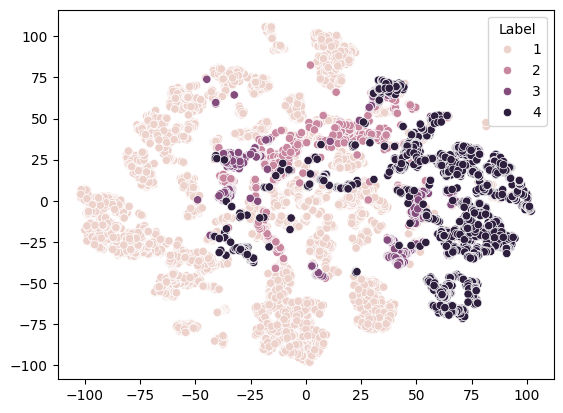

In [29]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 X와 레이블 y를 사용한다고 가정
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

sns.set_palette("deep")
sns.scatterplot(x = X_tsne[:, 0], y = X_tsne[:, 1], hue=y)
plt.legend(title='Label')
plt.show()


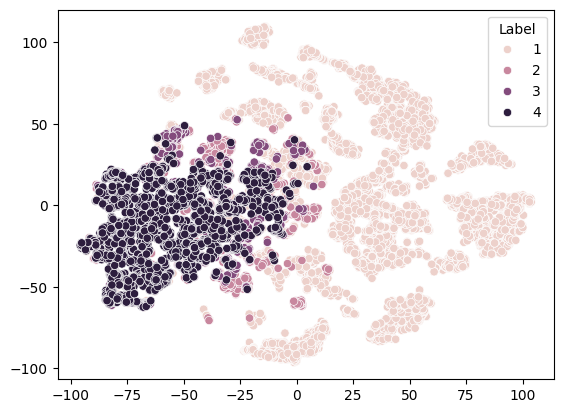

In [22]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 X와 레이블 y를 사용한다고 가정
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X=X[['x1', 'y1', 'z1', 'x2', 'y2', 'z2']])

sns.set_palette("deep")
sns.scatterplot(x = X_tsne[:, 0], y = X_tsne[:, 1], hue=y)
plt.legend(title='Label')
plt.show()


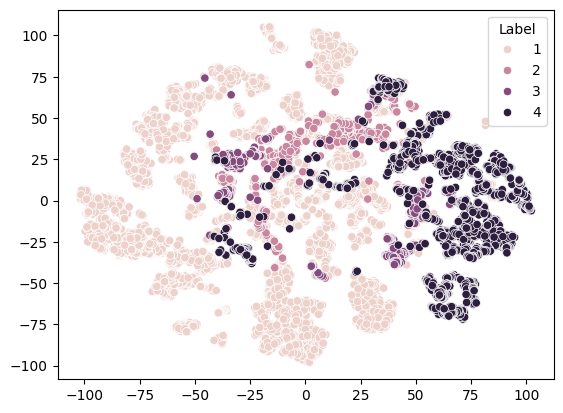

In [23]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 X와 레이블 y를 사용한다고 가정
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X=X[['x1', 'y1', 'z1', 'x3', 'y3', 'z3']])

sns.set_palette("deep")
sns.scatterplot(x = X_tsne[:, 0], y = X_tsne[:, 1], hue=y)
plt.legend(title='Label')
plt.show()


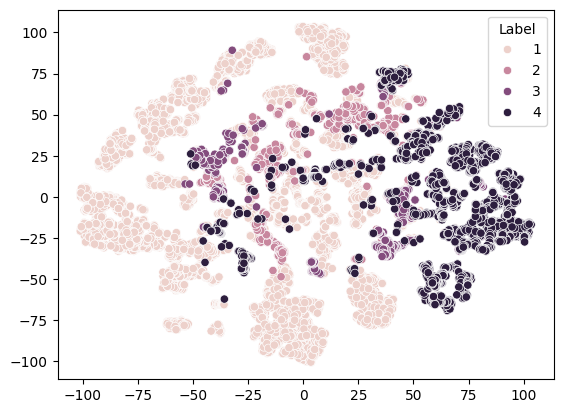

In [25]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 X와 레이블 y를 사용한다고 가정
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X=X[['x3', 'y3', 'z3', 'x2', 'y2', 'z2']])

sns.set_palette("deep")
sns.scatterplot(x = X_tsne[:, 0], y = X_tsne[:, 1], hue=y)
plt.legend(title='Label')
plt.show()


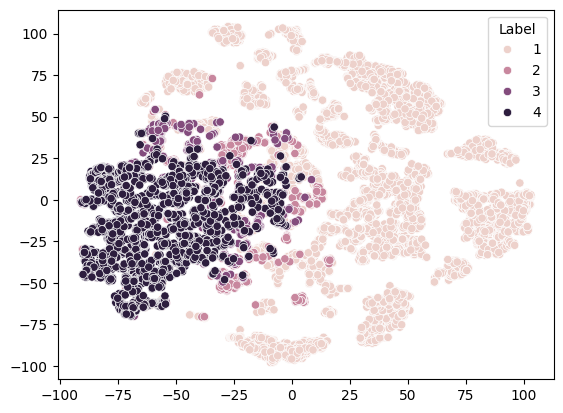

In [26]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 X와 레이블 y를 사용한다고 가정
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X=X[['x1', 'y1', 'z1']])

sns.set_palette("deep")
sns.scatterplot(x = X_tsne[:, 0], y = X_tsne[:, 1], hue=y)
plt.legend(title='Label')
plt.show()


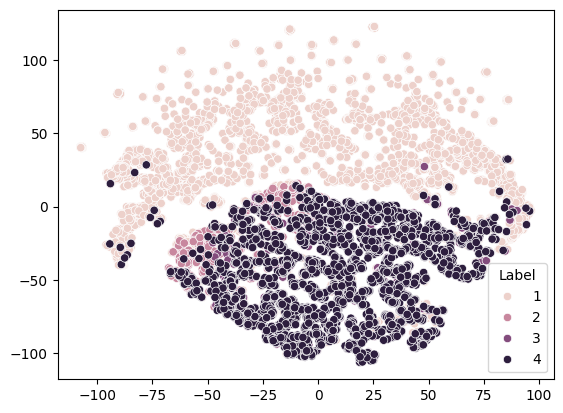

In [27]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 X와 레이블 y를 사용한다고 가정
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X=X[['x2', 'y2', 'z2']])

sns.set_palette("deep")
sns.scatterplot(x = X_tsne[:, 0], y = X_tsne[:, 1], hue=y)
plt.legend(title='Label')
plt.show()


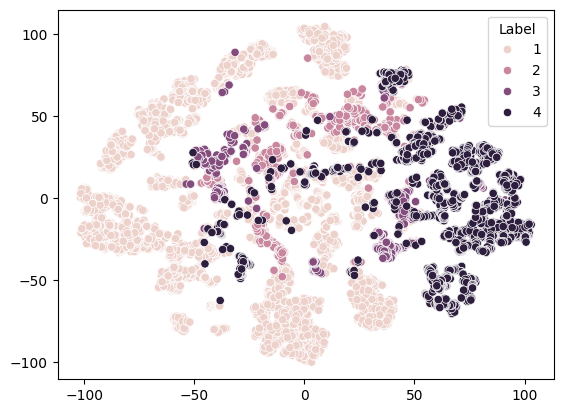

In [28]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 X와 레이블 y를 사용한다고 가정
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X=X[['x3', 'y3', 'z3']])

sns.set_palette("deep")
sns.scatterplot(x = X_tsne[:, 0], y = X_tsne[:, 1], hue=y)
plt.legend(title='Label')
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 'label' 열의 각 숫자의 갯수 카운트
label_counts = df_combined['label'].value_counts(sort=False)

# 시각화
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=label_counts.index, y=label_counts.values, palette='viridis')

# 막대 위에 숫자 표시
for p, count in zip(ax.patches, label_counts.values):
    ax.annotate(f'{count}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10)

plt.title('Count of Each Number in "label" Column')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

In [23]:
from sklearn.tree import export_graphviz
# Export as dot file
estimator = rf_model.estimators_[3]

export_graphviz(estimator, out_file='tree.dot',
                class_names=['1', '2', '3', '4'],
                max_depth = 3, # 표현하고 싶은 최대 depth
                precision = 3, # 소수점 표기 자릿수
                filled = True, # class별 color 채우기
                rounded=True, # 박스의 모양을 둥글게
               )

In [24]:
export_graphviz

<function sklearn.tree._export.export_graphviz(decision_tree, out_file=None, *, max_depth=None, feature_names=None, class_names=None, label='all', filled=False, leaves_parallel=False, impurity=True, node_ids=False, proportion=False, rotate=False, rounded=False, special_characters=False, precision=3, fontname='helvetica')>

In [25]:
import graphviz

In [26]:
with open("tree.dot") as f:
    dot_graph = f.read()

display(graphviz.Source(dot_graph))

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [37]:
# 생성된 .dot 파일을 .png로 변환
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# jupyter notebook에서 .png 직접 출력
from IPython.display import Image
Image(filename = 'tree.png')

FileNotFoundError: [WinError 2] 지정된 파일을 찾을 수 없습니다

In [ ]:
import matplotlib.pyplot as plt 
from sklearn import tree 
plt.figure(figsize=(10, 6))
tree.plot_tree(rf_model.estimators_[3]) #가장 정확도가 높은 트리 
plt.show()

In [ ]:
pip install pydotplus

In [26]:
import os 
os.environ["PATH"] += os.pathsep + 'C:\Program Files\Graphviz\bin'

In [29]:
from sklearn.tree import export_graphviz
import pydotplus 
import graphviz
from IPython.display import Image 
dot_data=export_graphviz(rf_model.estimators_[3], out_file=None, filled=True, rounded=True, special_characters=True)
graph=pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

InvocationException: GraphViz's executables not found

In [38]:
import mglearn

ImportError: 
`load_boston` has been removed from scikit-learn since version 1.2.

The Boston housing prices dataset has an ethical problem: as
investigated in [1], the authors of this dataset engineered a
non-invertible variable "B" assuming that racial self-segregation had a
positive impact on house prices [2]. Furthermore the goal of the
research that led to the creation of this dataset was to study the
impact of air quality but it did not give adequate demonstration of the
validity of this assumption.

The scikit-learn maintainers therefore strongly discourage the use of
this dataset unless the purpose of the code is to study and educate
about ethical issues in data science and machine learning.

In this special case, you can fetch the dataset from the original
source::

    import pandas as pd
    import numpy as np

    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]

Alternative datasets include the California housing dataset and the
Ames housing dataset. You can load the datasets as follows::

    from sklearn.datasets import fetch_california_housing
    housing = fetch_california_housing()

for the California housing dataset and::

    from sklearn.datasets import fetch_openml
    housing = fetch_openml(name="house_prices", as_frame=True)

for the Ames housing dataset.

[1] M Carlisle.
"Racist data destruction?"
<https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8>

[2] Harrison Jr, David, and Daniel L. Rubinfeld.
"Hedonic housing prices and the demand for clean air."
Journal of environmental economics and management 5.1 (1978): 81-102.
<https://www.researchgate.net/publication/4974606_Hedonic_housing_prices_and_the_demand_for_clean_air>


In [39]:
tree = mglearn.plots.plot_tree_not_monotone()
display(tree)

NameError: name 'mglearn' is not defined